<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

# Data Wrangling: Laptop Pricing

##  Table of contents


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Handle missing data</li>
            <ul>
                <li>Task 1 - Evaluate the dataset for missing data</li>
                <li>Task 2 - Replace missing values with the mean and the most frequent value</li>
            </ul>
        <li>Correct the data type of different data values as per requirement</li>
             <ul>
                <li>Task 3 - Fixing data types</li>
            </ul>       
        <li>Standardize and normalize the appropriate data attributes</li>
             <ul>
                <li>Task 4 - Data standardization and normalization</li>
            </ul> 
        <li>Visualize the data as grouped bar graph using Binning</li>
             <ul>
                <li>Task 5 - Binning</li>
            </ul> 
        <li>Converting a categorical data into numerical indicator variables</li>
             <ul>
                <li>Task 6 - Indicator variables</li>
            </ul> 
    </ul>
</div>

<hr>


## Data preparation

In [3]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

In [4]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [5]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"

In [6]:
await download(file_path, "laptops.csv")
file_name="laptops.csv"

Load data into a `pandas.DataFrame`:


In [29]:
df = pd.read_csv(file_name, header=0)

DataFrame overview

In [30]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 22.4+ KB
None


In [31]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


Update the `Screen_Size_cm` column such that all values are rounded to nearest 2 decimal places


In [32]:
df[['Screen_Size_cm']] = np.round(df[['Screen_Size_cm']],2)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


## Task - 1

### Evaluate the dataset for missing data

In [33]:
missing_data = df.isnull()
missing_data.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [34]:
for column in missing_data.columns:
    print(missing_data[column].value_counts())
    print(' \n')

Unnamed: 0
False    238
Name: count, dtype: int64
 

Manufacturer
False    238
Name: count, dtype: int64
 

Category
False    238
Name: count, dtype: int64
 

Screen
False    238
Name: count, dtype: int64
 

GPU
False    238
Name: count, dtype: int64
 

OS
False    238
Name: count, dtype: int64
 

CPU_core
False    238
Name: count, dtype: int64
 

Screen_Size_cm
False    234
True       4
Name: count, dtype: int64
 

CPU_frequency
False    238
Name: count, dtype: int64
 

RAM_GB
False    238
Name: count, dtype: int64
 

Storage_GB_SSD
False    238
Name: count, dtype: int64
 

Weight_kg
False    233
True       5
Name: count, dtype: int64
 

Price
False    238
Name: count, dtype: int64
 



In [35]:
true_counts = missing_data[missing_data == True].count()
true_counts

Unnamed: 0        0
Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         5
Price             0
dtype: int64

## Task - 2

### Replace with mean

Missing values in attributes that have continuous data are best replaced using Mean value. We note that values in "Weight_kg" attribute are continuous in nature, and some values are missing. Therefore,the code below replaces the missing values of weight with the average value of the attribute.


In [36]:
missing_weight_indices = df[pd.isnull(df['Weight_kg'])].index
missing_weight_indices

Index([29, 38, 49, 61, 68], dtype='int64')

In [37]:
df.loc[missing_weight_indices,'Weight_kg']

29   NaN
38   NaN
49   NaN
61   NaN
68   NaN
Name: Weight_kg, dtype: float64

In [38]:
avg_weight = df['Weight_kg'].mean()
avg_weight

1.8622317596566522

In [39]:
df['Weight_kg'].replace(np.nan,avg_weight,inplace = True)

In [40]:
df.loc[missing_weight_indices,'Weight_kg']

29    1.862232
38    1.862232
49    1.862232
61    1.862232
68    1.862232
Name: Weight_kg, dtype: float64

### Replace with the most frequent value

Missing values in attributes that have categorical data are best replaced using the most frequent value. Knowing that values in "Screen_Size_cm" attribute are categorical in nature, and some values are missing, the code below replaces the missing values of Screen Size with the most frequent value of the attribute.


In [41]:
missing_values_sz = df[pd.isnull(df["Screen_Size_cm"])].index
missing_values_sz

Index([120, 151, 187, 230], dtype='int64')

In [42]:
df.loc[missing_values_sz, "Screen_Size_cm"]

120   NaN
151   NaN
187   NaN
230   NaN
Name: Screen_Size_cm, dtype: float64

In [43]:
df["Screen_Size_cm"].value_counts()

Screen_Size_cm
39.62    89
35.56    64
38.10    23
33.78    20
33.02    18
43.94     7
43.18     5
31.75     4
30.48     4
Name: count, dtype: int64

In [44]:
df["Screen_Size_cm"].mode()[0]

39.62

In [45]:
df["Screen_Size_cm"].replace(np.nan,df["Screen_Size_cm"].mode()[0],inplace = True)

In [46]:
df.loc[missing_values_sz, "Screen_Size_cm"]

120    39.62
151    39.62
187    39.62
230    39.62
Name: Screen_Size_cm, dtype: float64

In [47]:
df["Screen_Size_cm"].head()

0    35.56
1    39.62
2    39.62
3    33.78
4    39.62
Name: Screen_Size_cm, dtype: float64

# Task - 3

### Fixing the data types
Both "Weight_kg" and "Screen_Size_cm" are seen to have the data type "Object", while both of them should be having a data type of "float". The code below fixes the data type of these two columns.


In [48]:
df[['Weight_kg','Screen_Size_cm']] = df[['Weight_kg','Screen_Size_cm']].astype('float')

In [49]:
df.dtypes

Unnamed: 0          int64
Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object

# Task - 4

### Data Standardization
The value of Screen_size usually has a standard unit of inches. Similarly, weight of the laptop is needed to be in pounds. Using the below mentioned units of conversion and the code below modifies the columns of the dataframe accordingly and updates their name.

```{math}
1 inch = 2.54 cm
1 kg   = 2.205 pounds
```


In [50]:
df['Weight_kg'].head()

0    1.60
1    2.20
2    2.20
3    1.22
4    1.91
Name: Weight_kg, dtype: float64

In [51]:
df['Weight_lb'] = df['Weight_kg'] * 2.205

In [52]:
df['Weight_lb'].head()

0    3.52800
1    4.85100
2    4.85100
3    2.69010
4    4.21155
Name: Weight_lb, dtype: float64

In [53]:
df['Screen_Size_cm'].head()

0    35.56
1    39.62
2    39.62
3    33.78
4    39.62
Name: Screen_Size_cm, dtype: float64

In [54]:
df['Screen_Size_in'] = df['Screen_Size_cm'] / 2.54

In [55]:
df['Screen_Size_in'].head()

0    14.000000
1    15.598425
2    15.598425
3    13.299213
4    15.598425
Name: Screen_Size_in, dtype: float64

In [56]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,Weight_lb,Screen_Size_in
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978,3.52800,14.000000
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634,4.85100,15.598425
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946,4.85100,15.598425
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244,2.69010,13.299213
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837,4.21155,15.598425


In [57]:
df.drop(columns = {'Screen_Size_cm','Weight_kg'}, inplace = True)

In [58]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,CPU_frequency,RAM_GB,Storage_GB_SSD,Price,Weight_lb,Screen_Size_in
0,0,Acer,4,IPS Panel,2,1,5,1.6,8,256,978,3.52800,14.000000
1,1,Dell,3,Full HD,1,1,3,2.0,4,256,634,4.85100,15.598425
2,2,Dell,3,Full HD,1,1,7,2.7,8,256,946,4.85100,15.598425
3,3,Dell,4,IPS Panel,2,1,5,1.6,8,128,1244,2.69010,13.299213
4,4,HP,4,Full HD,2,1,7,1.8,8,256,837,4.21155,15.598425


### Data Normalization
Often it is required to normalize a continuous data attribute. The code below normalizes the "CPU_frequency" attribute with respect to the maximum value available in the dataset.


In [59]:
df[["CPU_frequency"]].head()

,CPU_frequency
0,1.6
1,2.0
2,2.7
3,1.6
4,1.8


In [60]:
df[["CPU_frequency"]] = df[["CPU_frequency"]] / df[["CPU_frequency"]].max()
df[["CPU_frequency"]].head()

,CPU_frequency
0,0.551724
1,0.689655
2,0.931034
3,0.551724
4,0.620690


# Task - 5

### Binning
Binning is a process of creating a categorical attribute which splits the values of a continuous data into a specified number of groups. In this case, the code creates 3 bins for the attribute "Price". These bins would be named "Low", "Medium" and "High". The new attribute will be named "Price-binned".


In [61]:
df[["Price"]].head()

,Price
0,978
1,634
2,946
3,1244
4,837


Text(0.5, 1.0, 'Price histogram')

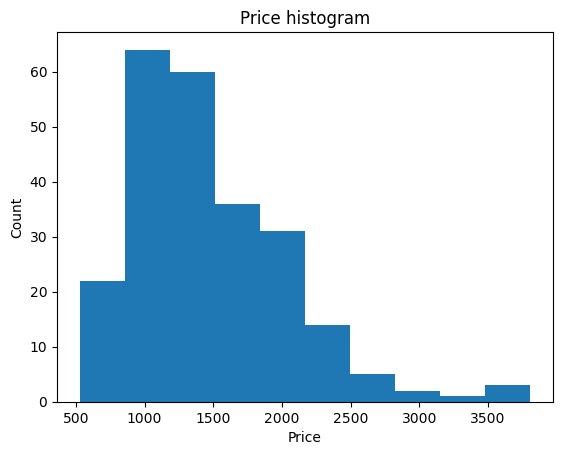

In [62]:
# General visualization of price distribution
plt.hist(df["Price"])
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Price histogram")

In [63]:
bins = np.linspace(df["Price"].min(),df["Price"].max(), 4)
bins

array([ 527.        , 1621.33333333, 2715.66666667, 3810.        ])

In [64]:
bin_labels = ['Low', 'Medium', 'High']

In [65]:
df['Price-binned'] = pd.cut(df["Price"], bins, labels=bin_labels, include_lowest = True)

In [66]:
df[['Price','Price-binned']]

,Price,Price-binned
0,978,Low
1,634,Low
2,946,Low
3,1244,Low
4,837,Low
...,...,...
233,1891,Medium
234,1950,Medium
235,2236,Medium
236,883,Low


In [67]:
df['Price-binned'].value_counts()

Price-binned
Low       160
Medium     72
High        6
Name: count, dtype: int64

Text(0.5, 1.0, 'Price bins')

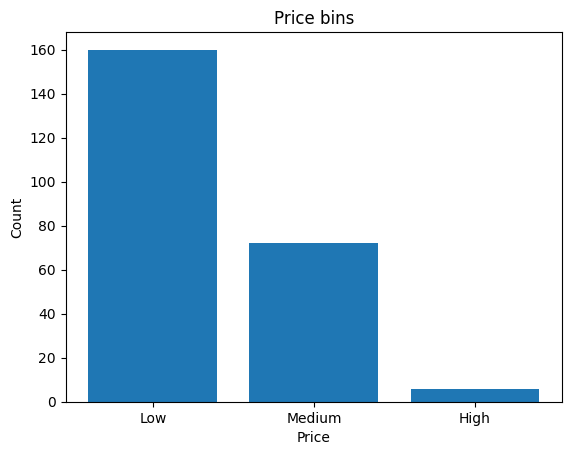

In [68]:
plt.bar(bin_labels, df['Price-binned'].value_counts())
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Price bins")

# Task - 6

### Indicator variables

The code below converts the "Screen" attribute of the dataset into 2 indicator variables, "Screen-IPS_panel" and "Screen-Full_HD". Furthermore, the "Screen" attribute is removed from the dataset.


In [69]:
dummy_variable = pd.get_dummies(df['Screen'])
dummy_variable

,Full HD,IPS Panel
0,False,True
1,True,False
2,True,False
3,False,True
4,True,False
...,...,...
233,False,True
234,True,False
235,False,True
236,True,False


In [70]:
dummy_variable.rename(columns = {'Full HD': 'Screen-Full_HD', 'IPS Panel': 'Screen-IPS_panel'}, inplace = True)
dummy_variable

,Screen-Full_HD,Screen-IPS_panel
0,False,True
1,True,False
2,True,False
3,False,True
4,True,False
...,...,...
233,False,True
234,True,False
235,False,True
236,True,False


In [71]:
df = pd.concat([df,dummy_variable], axis = 1)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,CPU_frequency,RAM_GB,Storage_GB_SSD,Price,Weight_lb,Screen_Size_in,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,Acer,4,IPS Panel,2,1,5,0.551724,8,256,978,3.52800,14.000000,Low,False,True
1,1,Dell,3,Full HD,1,1,3,0.689655,4,256,634,4.85100,15.598425,Low,True,False
2,2,Dell,3,Full HD,1,1,7,0.931034,8,256,946,4.85100,15.598425,Low,True,False
3,3,Dell,4,IPS Panel,2,1,5,0.551724,8,128,1244,2.69010,13.299213,Low,False,True
4,4,HP,4,Full HD,2,1,7,0.620690,8,256,837,4.21155,15.598425,Low,True,False


In [72]:
df.drop('Screen', axis = 1, inplace = True)
df

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,CPU_frequency,RAM_GB,Storage_GB_SSD,Price,Weight_lb,Screen_Size_in,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,Acer,4,2,1,5,0.551724,8,256,978,3.52800,14.000000,Low,False,True
1,1,Dell,3,1,1,3,0.689655,4,256,634,4.85100,15.598425,Low,True,False
2,2,Dell,3,1,1,7,0.931034,8,256,946,4.85100,15.598425,Low,True,False
3,3,Dell,4,2,1,5,0.551724,8,128,1244,2.69010,13.299213,Low,False,True
4,4,HP,4,2,1,7,0.620690,8,256,837,4.21155,15.598425,Low,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,233,Lenovo,4,2,1,7,0.896552,8,256,1891,3.74850,14.000000,Medium,False,True
234,234,Toshiba,3,2,1,5,0.827586,8,256,1950,2.64600,13.299213,Medium,True,False
235,235,Lenovo,4,2,1,5,0.896552,8,256,2236,2.99880,12.000000,Medium,False,True
236,236,Lenovo,3,3,1,5,0.862069,6,256,883,5.29200,15.598425,Low,True,False


In [73]:
print(df.head())

   Unnamed: 0 Manufacturer  Category  GPU  OS  CPU_core  CPU_frequency  \
0           0         Acer         4    2   1         5       0.551724   
1           1         Dell         3    1   1         3       0.689655   
2           2         Dell         3    1   1         7       0.931034   
3           3         Dell         4    2   1         5       0.551724   
4           4           HP         4    2   1         7       0.620690   

   RAM_GB  Storage_GB_SSD  Price  Weight_lb  Screen_Size_in Price-binned  \
0       8             256    978    3.52800       14.000000          Low   
1       4             256    634    4.85100       15.598425          Low   
2       8             256    946    4.85100       15.598425          Low   
3       8             128   1244    2.69010       13.299213          Low   
4       8             256    837    4.21155       15.598425          Low   

   Screen-Full_HD  Screen-IPS_panel  
0           False              True  
1            True     